In [73]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


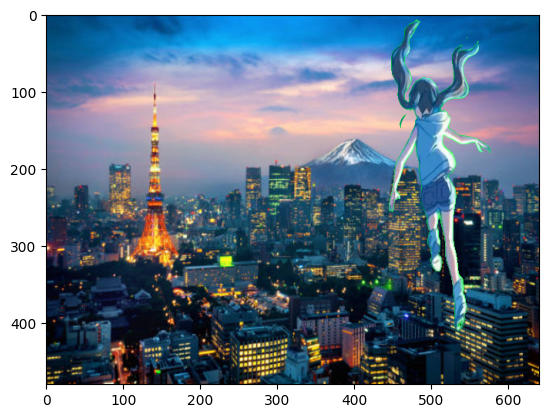

In [118]:
def resize_image(image):
    width = 640
    height = 480
    return cv2.resize(image, (width, height))


def compute_binary_mask(image, threshold_value):
    gray_image = (np.sum(image, axis=2)/3.0).astype(np.uint8)
    _, binary_mask = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)
    
    return binary_mask


green_background = resize_image(cv2.imread('./data/green_background.png'))
new_background = resize_image(cv2.imread('./data/new_background.jpg'))
object = resize_image(cv2.imread('./data/object.png'))


# get diff from green background and object
diff_image = cv2.absdiff(green_background, object)

binary_mask = compute_binary_mask(diff_image, 30)
binary_mask = np.stack((binary_mask,)*3, axis=-1)

# print(binary_mask)
result = np.where(binary_mask == 255, object, new_background)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
